# Project: Investigating the Jouyou Kanji (常用漢字) 

## Introduction

The Jouyou kanji (literally regular use Chinese Characters) are a list of kanji characters and readings annouced officially by the Japanese Ministry of Education. Currently it's a list of 2,136 characters but it's not an exhaustive list of all the kanjis in regular use. It is intended as a literacy baseline for those who have completed compulsory education, as well as a list of permitted characters and readings for use in official government documents. 


## Overview of the dataset

The dataset has 7 columns:
- New Column: Gives the kanji in it's shinjitai (new) form
- Old column: Gives the kanji in it's kyuujitai (old) form
- Radical: Radical of the kanji
- Strokes: Number of strokes of the kanji.
- Grade: specifies the grade which the kanji is taught in Elementary school in Japan. Grade "S" means it is taught in secondary school.
- Year Added: Specifies when the kanji was added if it wasn't in the original touyou kanji list in 1946.

## Investigation Overview
- How many strokes does a kanji have in average?
- What are the properties of the kanjis that were not in the original toyo list in 1946?
- What is the most common radical, which is the least common radical?
- At which grade or education level does a Japanese student taught the most kanji?

In [1]:
# Import the packages and load in the dataset
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
joyo_df = pd.read_csv('data/joyo_kanji.csv',index_col=0)

%matplotlib inline

### Preliminary wrangling

In [2]:
# Remove the last column
joyo_df = joyo_df.drop(joyo_df.columns[-1], axis=1)
# Grade should be categorical
grades = ['S','6','5','4','3','2','1']
k_grades = pd.CategoricalDtype(categories=grades,ordered=True)
joyo_df.grade = joyo_df.grade.astype(k_grades)
# year_added should be integer
joyo_df.year_added = joyo_df.year_added.fillna(1946).astype('int64')

## Kanji might look complicated to write

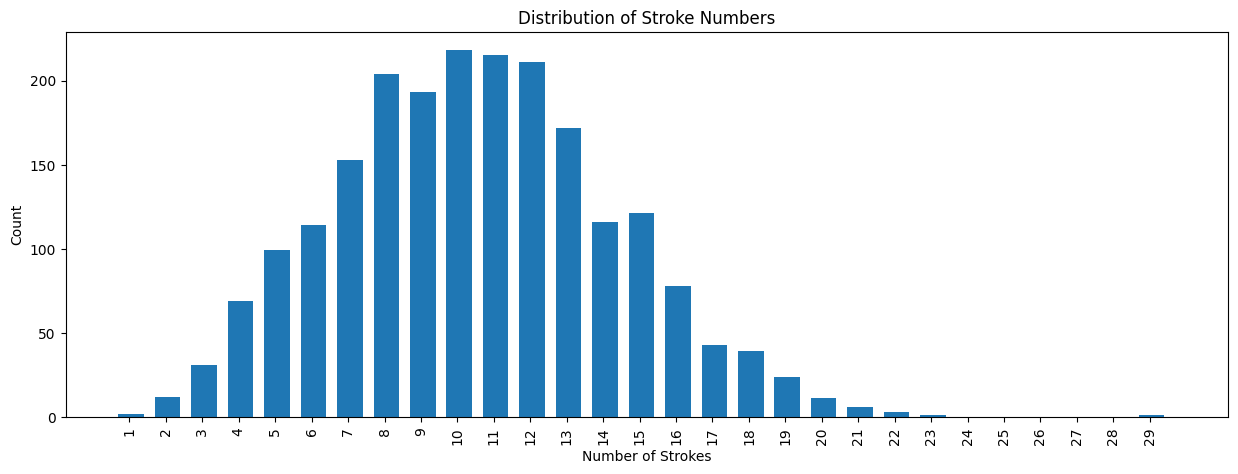

In [4]:
plt.figure(figsize = [15, 5])
bins = np.arange(0.7,joyo_df.strokes.max()+1.7,1)
plt.hist(data=joyo_df,x='strokes',bins=bins, width=0.7)
plt.xticks(np.arange(1,joyo_df.strokes.max()+1,1),rotation=90)
plt.ylabel('Count')
plt.xlabel('Number of Strokes')
plt.title('Distribution of Stroke Numbers');

And they are. On average a kanji has 10 strokes, with majority of kanji having around 8-12 range. The kanji with the most number of strokes has 29 which is 鬱!

## Which grades are the kanji that were added in 1981 and 2010 taught in?

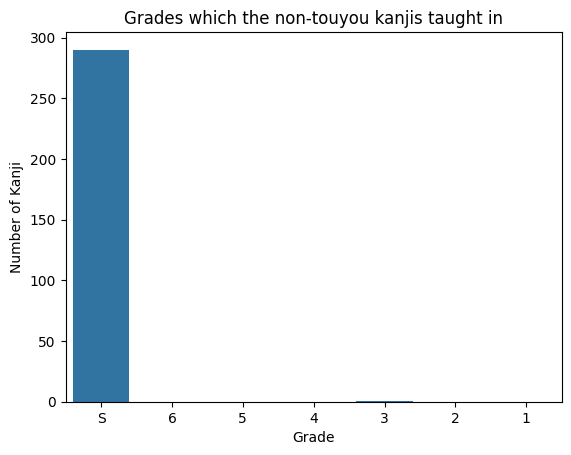

In [5]:
newly_added = joyo_df.query('year_added > 1946')
base_color = sb.color_palette()[0]
sb.countplot(data=newly_added,x='grade',color=base_color)
plt.xlabel('Grade')
plt.ylabel('Number of Kanji')
plt.title('Grades which the non-touyou kanjis taught in');

Majority of it are actually taught in secondary with a small number of it taught in grade 3

## Radicals? What about them?

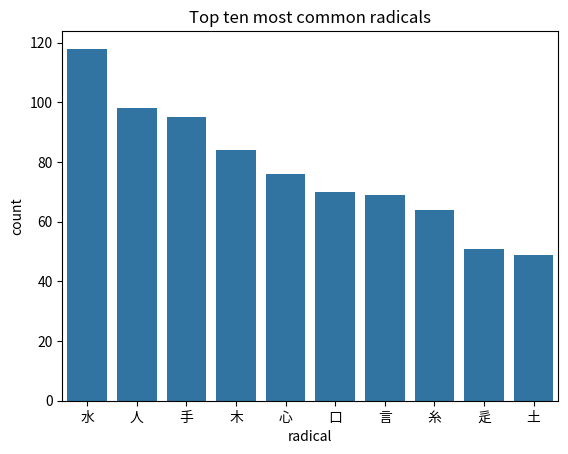

In [7]:
# Setting the proper front to render the radicals
fm.fontManager.addfont('fonts/NotoSansJP-Regular.otf')
font_name = fm.FontProperties(fname='fonts/NotoSansJP-Regular.otf').get_name()
plt.rc('font',family=font_name)

rad_order = joyo_df.radical.value_counts()
sb.countplot(data=joyo_df,x='radical',order = rad_order.iloc[:10].index,color=base_color)
plt.title('Top ten most common radicals');

Close to 120 kanjis have water radical as their radical. That's cool but which radical has the least number?

In [8]:
print(f'The radical with the least number of kanji is : {rad_order.iloc[-1:].index[0]}')

The radical with the least number of kanji is : 隶


Are there kanjis that have the same radical to its new form?

In [9]:
joyo_df.query('radical == new').shape

(121, 6)

Yes there are with 121 kanji having the same exact radical to it's new form. Which means some radicals have their own kanji!

## At which grade or education level does a Japanese student taught the most kanji?

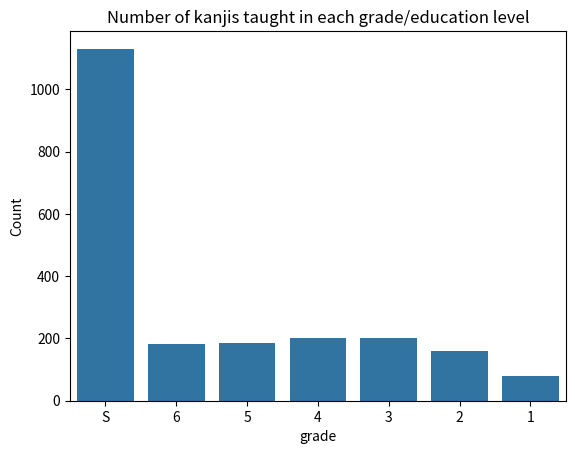

In [10]:
sb.countplot(data=joyo_df,x='grade',color=base_color)
plt.ylabel('Count')
plt.title('Number of kanjis taught in each grade/education level');

Looks like a huge chunk of kanjis are taught in high school (50% of the jouyou kanji!). In elementary school a student is taught about 100-200 kanji depending on your grade, with grades 3,4 having close to 200. 